In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0
)

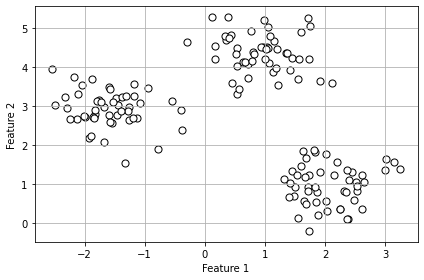

In [6]:
plt.scatter(
    X[:, 0],
    X[:, 1],
    c='white',
    marker='o',
    edgecolors='black',
    s=50
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

In [15]:
# Basis of K-means algorithm:
# 1. Randomly pick k centroids from examples as initial cluster centers
# 2. Assign each example to the nearest centroid
# 3. Move the centroids to the center of the examples that were assigned to it
# 4. Repeat steps 2 and 3 until cluster assignments do not change or a user-defined tolerance
# or maximum number of iterations is reached

km = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=0
)
y_km = km.fit_predict(X)

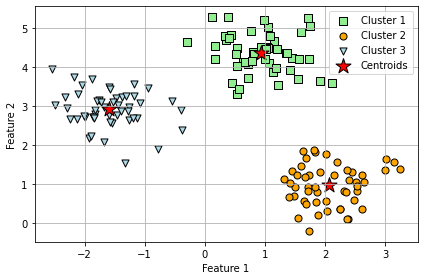

In [16]:
# plot features
mask_cluster1 = y_km == 0
plt.scatter(
    X[mask_cluster1, 0],
    X[mask_cluster1, 1],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolors='black',
    label='Cluster 1'
)

mask_cluster2 = y_km == 1
plt.scatter(
    X[mask_cluster2, 0],
    X[mask_cluster2, 1],
    s=50,
    c='orange',
    marker='o',
    edgecolors='black',
    label='Cluster 2'
)

mask_cluster3 = y_km == 2
plt.scatter(
    X[mask_cluster3, 0],
    X[mask_cluster3, 1],
    s=50,
    c='lightblue',
    marker='v',
    edgecolors='black',
    label='Cluster 3'
)

plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250,
    marker='*',
    c='red',
    edgecolors='black',
    label='Centroids'
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [18]:
# placing centroids using K-means++
# 1. Initialize empty set M to store k-centroids
# 2. Randomly choose the first centroid and assign to M
# 3. For each example that is not in M, find minimum squared distance to any of the centroids in M
# 4. Randomly select the next centroid using weighted probability distribution dp^2 / sum(di^2, i=0..N).
# The larger the squared distance, the more likely a point gets chosen as the centroid.
# 5. Repeat 3-4 until k centroids are chosen.
# 6. Assign each example to the nearest centroid
# 7. Move the centroids to the center of the examples that were assigned to it
# 8. Repeat steps 6 and 7 until cluster assignments do not change or a user-defined tolerance
# or maximum number of iterations is reached

km_pp = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=0
)
y_km_pp = km_pp.fit_predict(X)

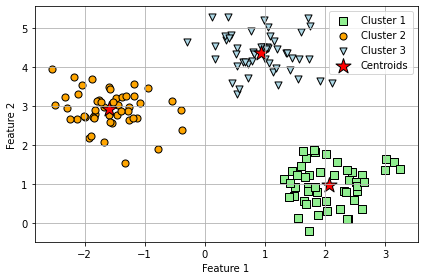

In [19]:
# plot features
mask_cluster1 = y_km_pp == 0
plt.scatter(
    X[mask_cluster1, 0],
    X[mask_cluster1, 1],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolors='black',
    label='Cluster 1'
)

mask_cluster2 = y_km_pp == 1
plt.scatter(
    X[mask_cluster2, 0],
    X[mask_cluster2, 1],
    s=50,
    c='orange',
    marker='o',
    edgecolors='black',
    label='Cluster 2'
)

mask_cluster3 = y_km_pp == 2
plt.scatter(
    X[mask_cluster3, 0],
    X[mask_cluster3, 1],
    s=50,
    c='lightblue',
    marker='v',
    edgecolors='black',
    label='Cluster 3'
)

plt.scatter(
    km_pp.cluster_centers_[:, 0],
    km_pp.cluster_centers_[:, 1],
    s=250,
    marker='*',
    c='red',
    edgecolors='black',
    label='Centroids'
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [20]:
# K-means with Elbow Method for optimal cluster size selection
# distortions list contains sum of squared errors
distortions = []
max_clusters = 11
for n_clusters in range(1, max_clusters):
    km_pp = KMeans(
        n_clusters=n_clusters,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0
    )
    km_pp.fit(X)
    distortions.append(km_pp.inertia_)

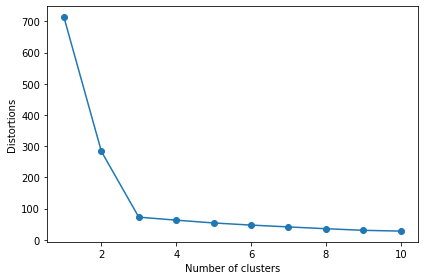

In [21]:
plt.plot(range(1, max_clusters), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.tight_layout()
plt.show()